<a href="https://colab.research.google.com/github/cauefeder/Finances/blob/master/Best_Return_12m_vs_Worst_Returns_36m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fetching S&P 500 symbols...
Calculating returns...


ERROR:yfinance:AMTM: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', 'ytd', 'max']
ERROR:yfinance:$BRK.B: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$BF.B: possibly delisted; no price data found  (period=1y)
ERROR:yfinance:SW: Period '1y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', 'ytd', 'max']



Top 20 Performing Stocks (Last 12 Months):
    Symbol  Return  Initial Price  Final Price       Volume
473    VST  309.24          34.73       142.12   6550189.08
359   PLTR  204.41          19.94        60.70  58178482.32
346   NVDA  194.66          49.64       146.27 401184432.06
53    AXON  171.36         221.58       601.29    530045.19
208    GEV  134.66         142.02       333.26   3539929.94
275    KKR  130.32          66.05       152.13   4217125.42
187   FICO  128.64        1027.15      2348.45    172245.94
404    RCL  128.38         102.57       234.25   2417689.77
434   TRGP  128.35          84.52       193.00   1634931.26
458    UAL  127.98          39.38        89.78   8334824.97
235    HWM  125.44          51.35       115.77   2851186.71
427    SYF  119.76          29.64        65.13   4035505.66
146    DFS  108.94          83.59       174.65   1722384.56
218   GDDY  108.25          90.63       188.74   1470033.40
213     GM  106.90          27.89        57.71  15886886

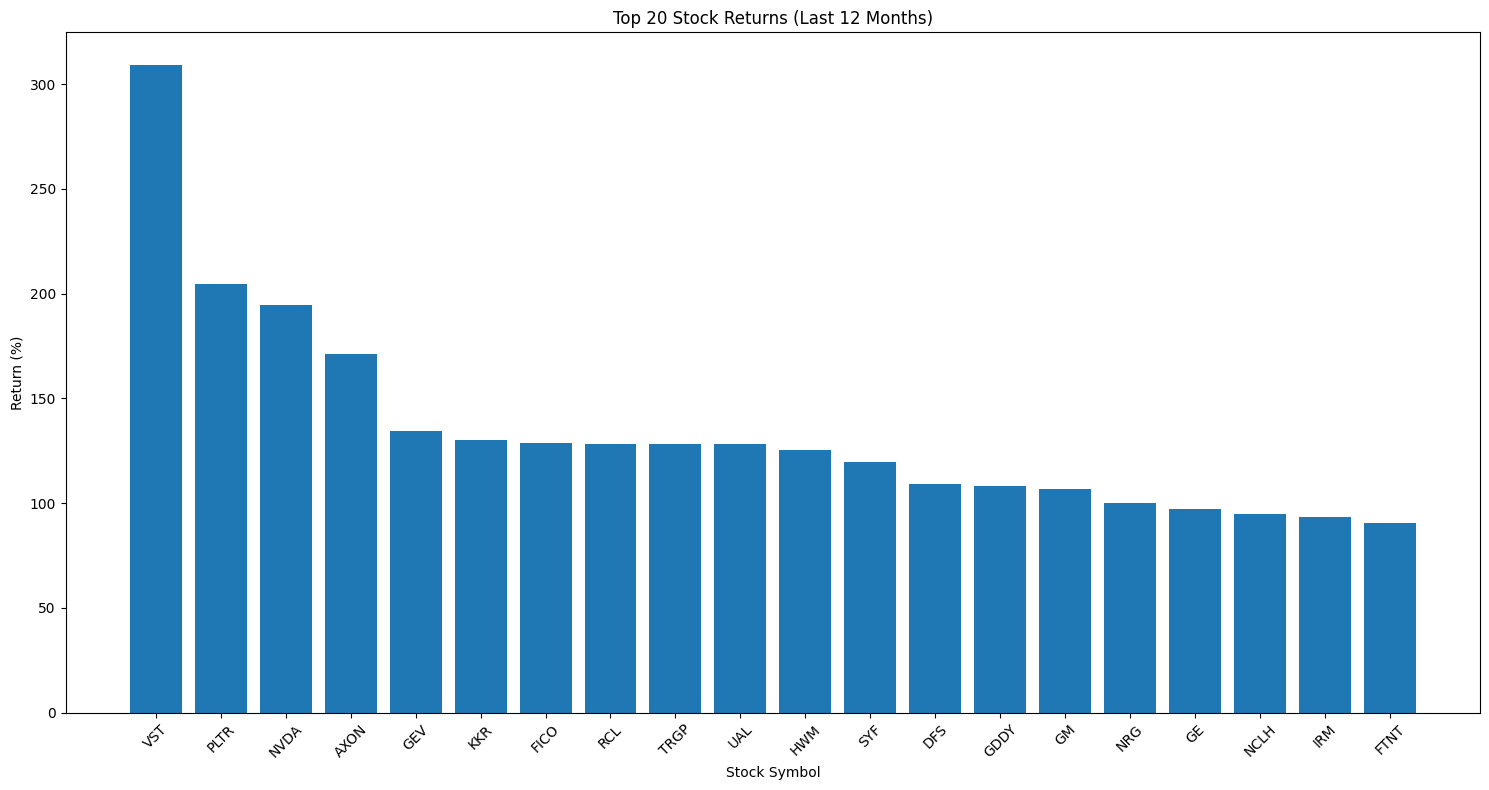

In [ ]:
#THE BEST ONE
# Import required libraries
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

# Function to get S&P 500 symbols
def get_sp500_symbols():
    """
    Get list of S&P 500 symbols using pandas datareader
    """
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    table = pd.read_html(url)
    df = table[0]
    return df['Symbol'].tolist()

# Function to calculate returns
def calculate_returns(symbols, period='1y'):
    """
    Calculate returns for given symbols over specified period

    Parameters:
    symbols (list): List of stock symbols
    period (str): Period for return calculation (default: '1y')

    Returns:
    pandas.DataFrame: DataFrame with symbol and returns
    """
    returns_data = []

    for symbol in symbols:
        try:
            # Get stock data
            stock = yf.Ticker(symbol)
            hist = stock.history(period=period)

            if len(hist) > 0:
                # Calculate return
                initial_price = hist['Close'].iloc[0]
                final_price = hist['Close'].iloc[-1]
                total_return = ((final_price - initial_price) / initial_price) * 100

                returns_data.append({
                    'Symbol': symbol,
                    'Return': total_return,
                    'Initial Price': initial_price,
                    'Final Price': final_price,
                    'Volume': hist['Volume'].mean()
                })

        except Exception as e:
            print(f"Error processing {symbol}: {str(e)}")
            continue

    return pd.DataFrame(returns_data)

# Get S&P 500 symbols
print("Fetching S&P 500 symbols...")
symbols = get_sp500_symbols()

# Calculate returns
print("Calculating returns...")
returns_df = calculate_returns(symbols)

# Sort by returns and get top 20
top_20_stocks = returns_df.sort_values('Return', ascending=False).head(20)

# Format the results
pd.options.display.float_format = '{:.2f}'.format
print("\nTop 20 Performing Stocks (Last 12 Months):")
print("==========================================")
print(top_20_stocks[['Symbol', 'Return', 'Initial Price', 'Final Price', 'Volume']])

# Optional: Create a bar plot of the top 20 returns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.bar(top_20_stocks['Symbol'], top_20_stocks['Return'])
plt.xticks(rotation=45)
plt.title('Top 20 Stock Returns (Last 12 Months)')
plt.xlabel('Stock Symbol')
plt.ylabel('Return (%)')
plt.tight_layout()
plt.show()

Fetching S&P 500 symbols...
Calculating returns over 36 months...
Processing 10/503 stocks...
Processing 20/503 stocks...
Processing 30/503 stocks...
Processing 40/503 stocks...
Processing 50/503 stocks...
Processing 60/503 stocks...
Processing 70/503 stocks...
Processing 80/503 stocks...
Processing 90/503 stocks...
Processing 100/503 stocks...
Processing 110/503 stocks...
Processing 120/503 stocks...
Processing 130/503 stocks...
Processing 140/503 stocks...
Processing 150/503 stocks...
Processing 160/503 stocks...
Processing 170/503 stocks...
Processing 180/503 stocks...
Processing 190/503 stocks...
Processing 200/503 stocks...
Processing 210/503 stocks...
Processing 220/503 stocks...
Processing 230/503 stocks...
Processing 240/503 stocks...
Processing 250/503 stocks...
Processing 260/503 stocks...
Processing 270/503 stocks...
Processing 280/503 stocks...
Processing 290/503 stocks...
Processing 300/503 stocks...
Processing 310/503 stocks...
Processing 320/503 stocks...
Processing 330/

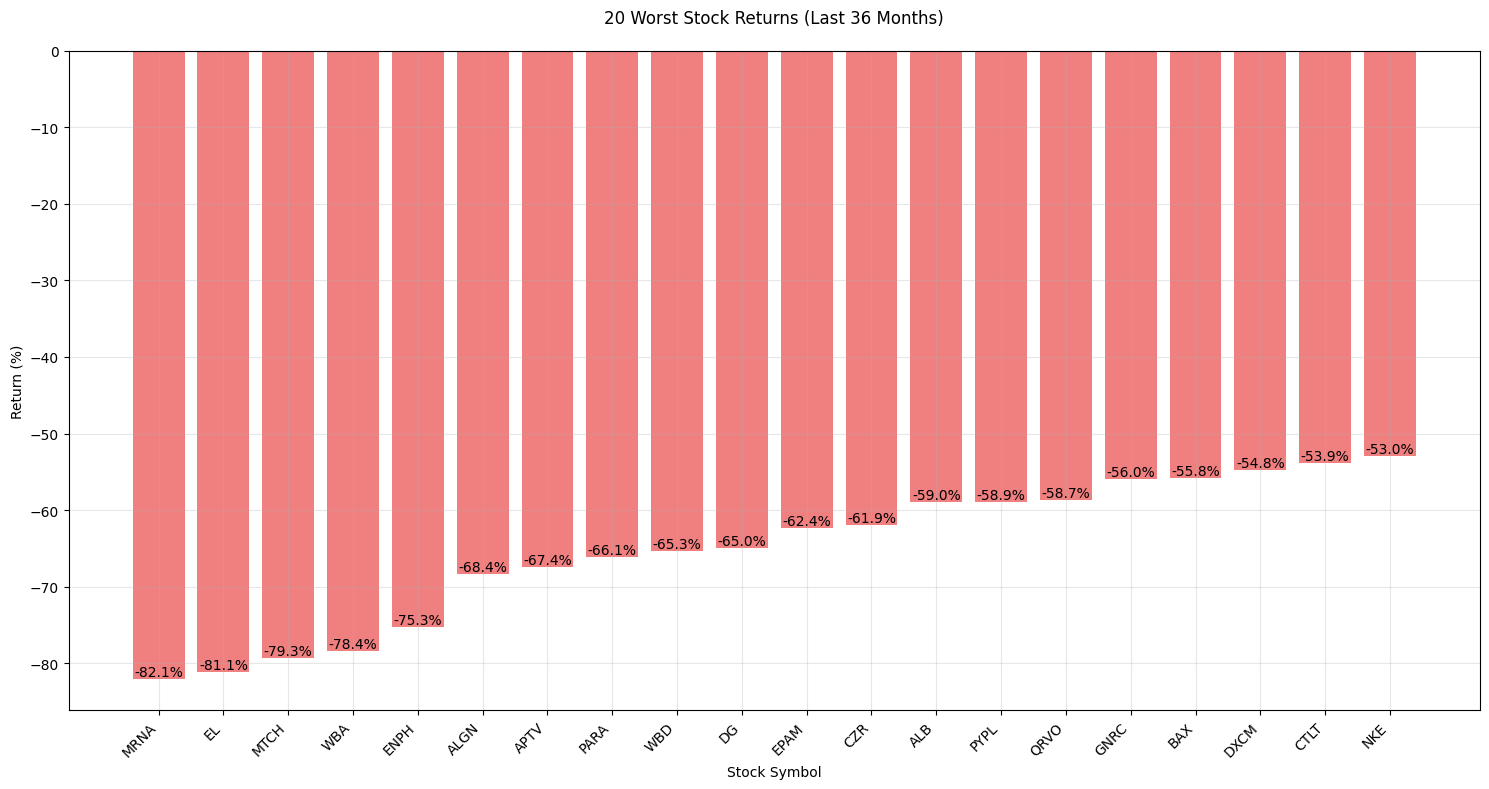

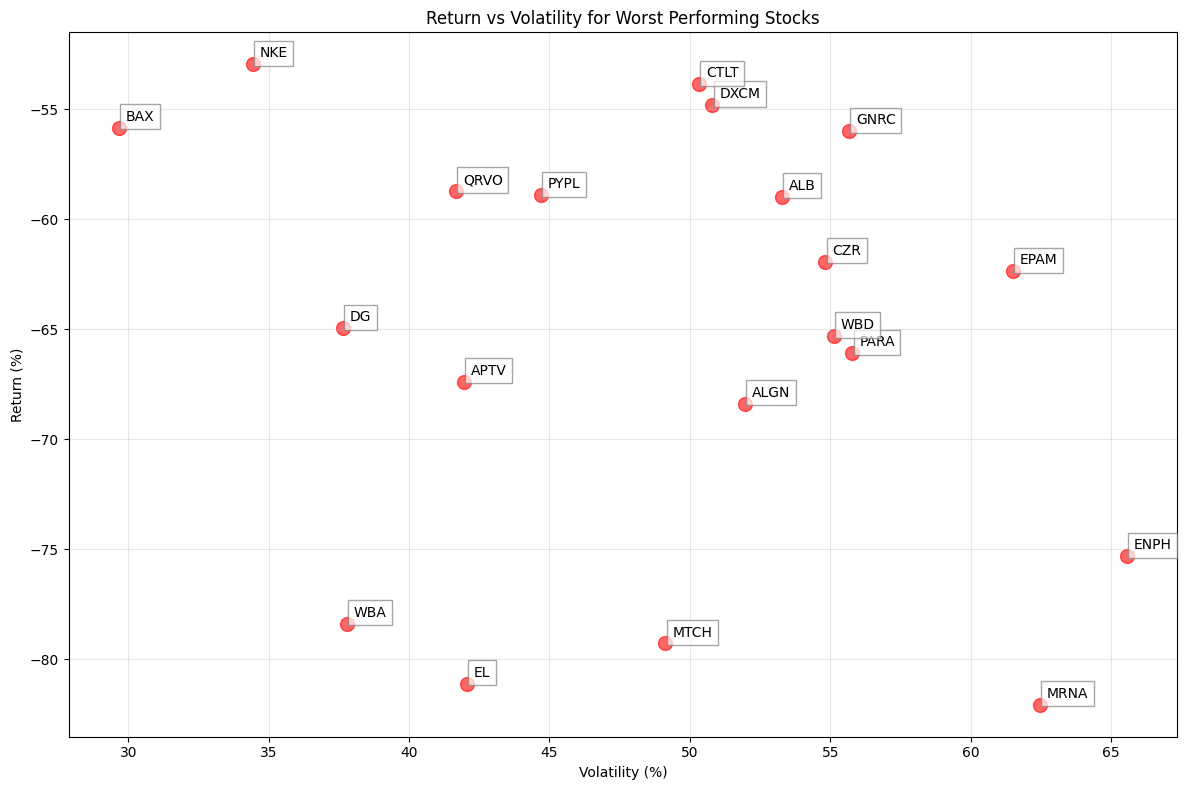

In [ ]:
# Import required libraries
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

# Function to get S&P 500 symbols and clean them
def get_sp500_symbols():
    """
    Get list of S&P 500 symbols using pandas datareader and clean special cases
    """
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    table = pd.read_html(url)
    df = table[0]

    # Clean symbols
    df['Symbol'] = df['Symbol'].apply(lambda x: x.replace('.','-'))

    # Remove any symbols starting with '$'
    df['Symbol'] = df['Symbol'].apply(lambda x: x.strip('$'))

    return df['Symbol'].tolist()

# Function to calculate returns using start and end dates
def calculate_returns(symbols):
    """
    Calculate returns for given symbols over specified period
    """
    # Calculate dates for 36 months ago
    end_date = datetime.now()
    start_date = end_date - timedelta(days=1095)  # approximately 36 months

    returns_data = []
    failed_symbols = []

    total_symbols = len(symbols)
    for i, symbol in enumerate(symbols, 1):
        try:
            # Print progress
            if i % 10 == 0:
                print(f"Processing {i}/{total_symbols} stocks...")

            # Get stock data
            stock = yf.Ticker(symbol)
            hist = stock.history(start=start_date, end=end_date)

            if len(hist) > 0:
                # Calculate return
                initial_price = hist['Close'].iloc[0]
                final_price = hist['Close'].iloc[-1]
                total_return = ((final_price - initial_price) / initial_price) * 100

                # Calculate additional metrics
                max_drawdown = ((hist['Close'].min() - hist['Close'].max()) / hist['Close'].max()) * 100
                volatility = hist['Close'].pct_change().std() * np.sqrt(252) * 100  # Annualized volatility

                # Calculate average daily volume (in millions)
                avg_volume = hist['Volume'].mean() / 1_000_000

                returns_data.append({
                    'Symbol': symbol,
                    'Return': total_return,
                    'Initial Price': initial_price,
                    'Final Price': final_price,
                    'Avg Daily Volume (M)': avg_volume,
                    'Max Drawdown %': max_drawdown,
                    'Volatility %': volatility
                })
        except Exception as e:
            failed_symbols.append((symbol, str(e)))
            continue

    # Print failed symbols at the end
    if failed_symbols:
        print("\nFailed to process the following symbols:")
        for symbol, error in failed_symbols:
            print(f"{symbol}: {error}")

    return pd.DataFrame(returns_data)

# Get S&P 500 symbols
print("Fetching S&P 500 symbols...")
symbols = get_sp500_symbols()

# Calculate returns
print("Calculating returns over 36 months...")
returns_df = calculate_returns(symbols)

# Sort by returns (ascending to get worst performers) and get bottom 20
worst_20_stocks = returns_df.sort_values('Return', ascending=True).head(20)

# Format the results
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
print("\nWorst 20 Performing Stocks (Last 36 Months):")
print("============================================")
display_cols = ['Symbol', 'Return', 'Initial Price', 'Final Price', 'Avg Daily Volume (M)', 'Max Drawdown %', 'Volatility %']
print(worst_20_stocks[display_cols].to_string())

import matplotlib.pyplot as plt
import numpy as np

# Create figure and axis with larger size
plt.figure(figsize=(15, 8))

# Plot bars
bars = plt.bar(range(len(worst_20_stocks)), worst_20_stocks['Return'], color='lightcoral')

# Customize the plot
plt.title('20 Worst Stock Returns (Last 36 Months)', fontsize=12, pad=20)
plt.xlabel('Stock Symbol', fontsize=10)
plt.ylabel('Return (%)', fontsize=10)

# Set x-axis ticks with stock symbols
plt.xticks(range(len(worst_20_stocks)), worst_20_stocks['Symbol'], rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

# Create scatter plot
plt.figure(figsize=(12, 8))

# Plot scatter points
plt.scatter(worst_20_stocks['Volatility %'], worst_20_stocks['Return'],
           color='red', alpha=0.6, s=100)

# Add labels for each point
for i, symbol in enumerate(worst_20_stocks['Symbol']):
    plt.annotate(symbol,
                (worst_20_stocks['Volatility %'].iloc[i], worst_20_stocks['Return'].iloc[i]),
                xytext=(5, 5),
                textcoords='offset points',
                bbox=dict(facecolor='white', edgecolor='gray', alpha=0.7))

# Customize the plot
plt.title('Return vs Volatility for Worst Performing Stocks', fontsize=12)
plt.xlabel('Volatility (%)', fontsize=10)
plt.ylabel('Return (%)', fontsize=10)
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()